In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from pprint import pprint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1.Dataset

In [2]:
airbnb =pd.read_csv("C:/Users/Madalena Nunes/OneDrive/Ambiente de Trabalho/Business Analytics/Tese/data/cleaned_data.csv")

In [3]:
airbnb['host_since'] = pd.to_datetime(airbnb['host_since'])
airbnb['first_review'] = pd.to_datetime(airbnb['first_review'])

# 2. EDA

## 2.1. Numerical variables

In [4]:
# verificando as principais estatísticas numéricas
estatisticas=airbnb.describe()
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(estatisticas)

         Unnamed: 0  host_is_superhost  host_listings_count      latitude  \
count  17521.000000       17511.000000         17511.000000  17521.000000   
mean    8760.000000           0.289704            20.740734     38.761821   
std     5058.021369           0.453638            76.178916      0.114222   
min        0.000000           0.000000             0.000000     38.676449   
25%     4380.000000           0.000000             1.000000     38.710890   
50%     8760.000000           0.000000             3.000000     38.717040   
75%    13140.000000           1.000000            11.000000     38.741810   
max    17520.000000           1.000000          2249.000000     39.302140   

          longitude  accommodates     bathrooms      bedrooms          beds  \
count  17521.000000  17521.000000  17453.000000  17521.000000  17521.000000   
mean      -9.208633      4.118372      1.392311      1.739855      2.600993   
std        0.114214      2.371642      0.858111      1.122880      1.

`price `

In [5]:
# visualizando a média de preços por região
médias_por_região = airbnb.groupby('neighborhood')['price'].mean().sort_values(ascending=False)
médias_por_região

neighborhood
Aveiras de Baixo                                     450.000000
Cardosas                                             287.000000
Freiria                                              281.000000
Ota                                                  249.000000
Vale do Paraso                                       220.000000
Pvoa de Santa Iria e Forte da Casa                   189.571429
Santa Brbara                                         184.833333
Bucelas                                              184.700000
Vermelha                                             167.666667
Alhandra, So Joo dos Montes e Calhandriz             158.384615
Almargem do Bispo, Pro Pinheiro e Montelavar         151.960000
Castanheira do Ribatejo e Cachoeiras                 151.000000
Arranh                                               150.000000
Turcifal                                             148.900000
Azueira e Sobral da Abelheira                        146.666667
Enxara do Bispo, Gradil e V

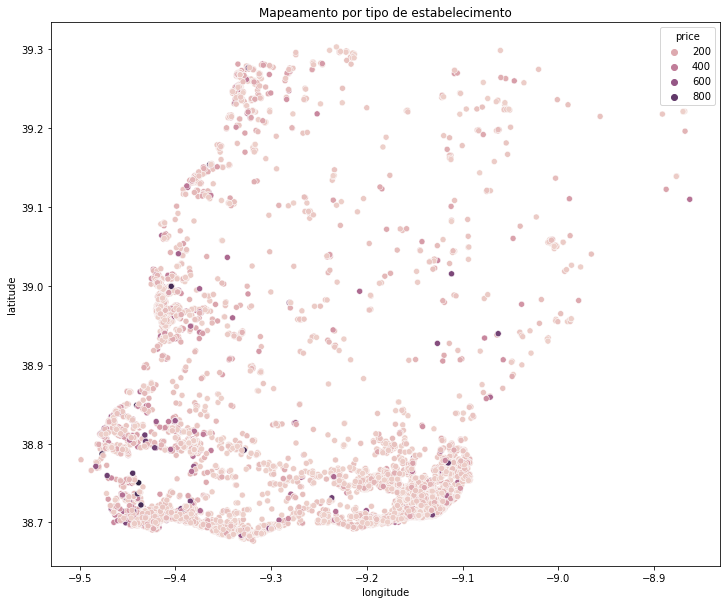

In [6]:
# definindo a área de plotagem
fig, ax = plt.subplots(figsize = (12,10))

# plotando o gráfico
ax = sns.scatterplot(data=airbnb, y="latitude", x="longitude", hue='price')
ax.set_title('Mapeamento por tipo de estabelecimento')
plt.show()

In [7]:
print(f'A média geral de preços é: €{airbnb.price.mean():.2f}')

A média geral de preços é: €94.72


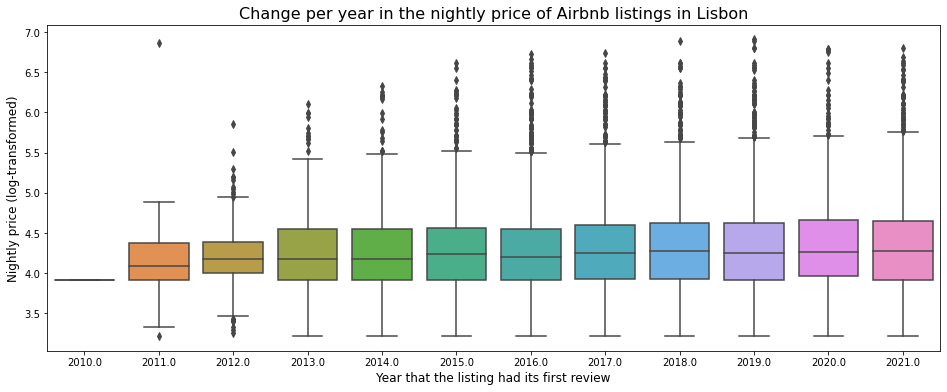

In [8]:
plt.figure(figsize=(16,6))
sns.boxplot(airbnb.first_review.dt.year, np.log(airbnb.price))
plt.xlabel('Year that the listing had its first review', fontsize=12)
plt.ylabel('Nightly price (log-transformed)', fontsize=12)
plt.title('Change per year in the nightly price of Airbnb listings in Lisbon', fontsize=16)
plt.show()

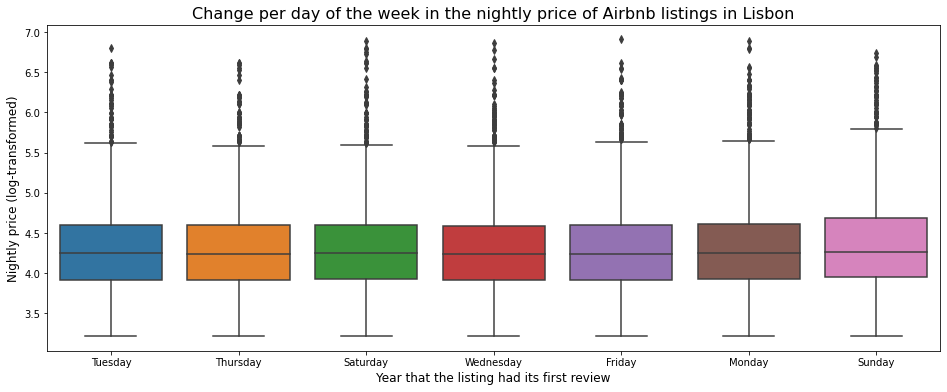

In [9]:
plt.figure(figsize=(16,6))
sns.boxplot(airbnb.first_review.dt.day_name(), np.log(airbnb.price))
plt.xlabel('Year that the listing had its first review', fontsize=12)
plt.ylabel('Nightly price (log-transformed)', fontsize=12)
plt.title('Change per day of the week in the nightly price of Airbnb listings in Lisbon', fontsize=16)
plt.show()

As we can see, Fridays and Saturdays are more expensive compared to the other days of the weeks, perhaps due to higher demand for lodging.

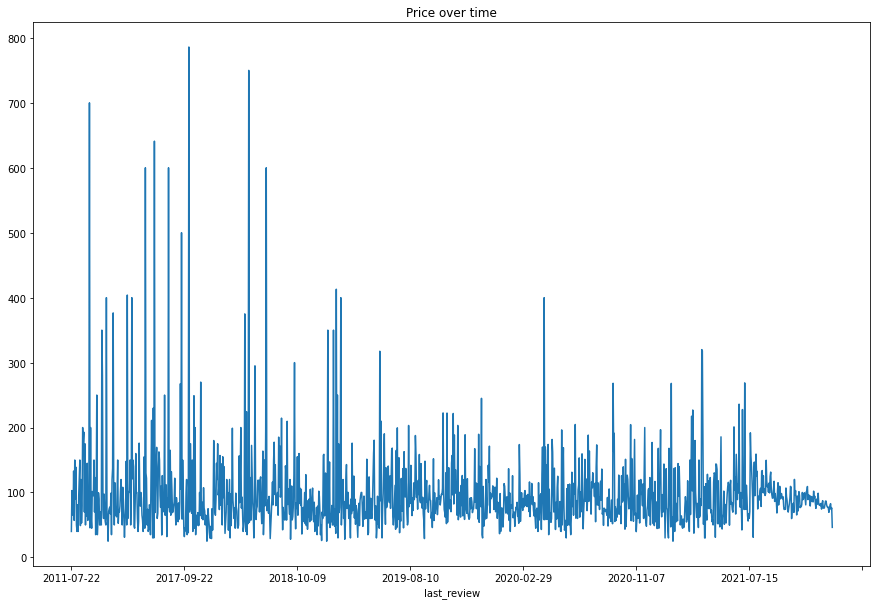

In [10]:
# Qual a variação do preço ao longo do tempo?
plt.figure(figsize=(15,10))

# plotando o gráfico
airbnb.groupby('last_review')['price'].mean().plot()
plt.title('Price over time')
plt.show()

In [11]:
print("Mean nightly price of listings in each year on Airbnb in Lisbon:")
print(round(airbnb.set_index('first_review').price.resample('YS').mean(),2))

Mean nightly price of listings in each year on Airbnb in Lisbon:
first_review
2010-01-01    50.00
2011-01-01    86.54
2012-01-01    75.22
2013-01-01    84.28
2014-01-01    85.29
2015-01-01    87.40
2016-01-01    89.98
2017-01-01    89.58
2018-01-01    91.06
2019-01-01    91.55
2020-01-01    94.27
2021-01-01    95.47
Name: price, dtype: float64


In [12]:
print("Median nightly price of listings in each year on Airbnb in Lisbon:")
print(round(airbnb.set_index('first_review').price.resample('YS').median(),2))

Median nightly price of listings in each year on Airbnb in Lisbon:
first_review
2010-01-01    50.0
2011-01-01    60.0
2012-01-01    65.0
2013-01-01    65.0
2014-01-01    65.0
2015-01-01    69.0
2016-01-01    67.0
2017-01-01    70.0
2018-01-01    71.5
2019-01-01    70.0
2020-01-01    71.0
2021-01-01    72.0
Name: price, dtype: float64


In term of changes in prices over time, the average price per night for Airbnb listings in Lisbon has increased  over the last 10 years. In particular, the top end of property prices has increased, resulting in a larger increase in the mean price compared to the median. The mean and the median price in 2010 was 50€  , whereas the mean price in 2021 (the last complete year of data) was 95.47€ and the median 72.0€.

`host_listings_count`

The median number of listings that the host of each listing has is 3. This means that on average (median) each listing is hosted by a host who only manages that listing. The mean is higher (20.740734) due to some hosts managing some (very) large numbers of listings, as discussed below in the Time Series section. For example, the host with the highest number of listings has 2249.000000 listings under its ID. About 21% of listings are from hosts with one listing.

Two difficulties in discerning how many listings hosts have on average are:

* 1.this number is only known on the level of the listing, so hosts with more listings are represented more frequently (e.g a host with 10 listings may be represented up to 10 times in the dataset)

* 2.a host's other listings may not be in Lisbon, so some multi-listing hosts may appear multiple times in the dataset, and others may appear only once

In [13]:
print("Median number of listings per host:", int(airbnb.host_listings_count.median()))
print("Mean number of listings per host:", int(round(airbnb.host_listings_count.mean())))
print("Highest number of listins per host:", int(round(airbnb.host_listings_count.max())))
print(f"{int(round(100*len(airbnb[airbnb.host_listings_count == 1])/len(airbnb)))}% of listings are from hosts with one listing.")

Median number of listings per host: 3
Mean number of listings per host: 21
Highest number of listins per host: 2249
21% of listings are from hosts with one listing.


`accommodates`, `bathrooms`, `bedrooms` and `beds`

The most common property setup sleeps four people in one bed in one bedroom, with one bathroom. Unsurprisingly, properties that accommodate more people achieve noticeably higher rates per night, with diminishing returns coming after about 11 people. **rever**

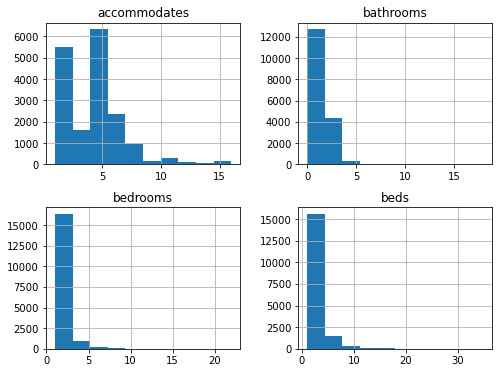

In [14]:
airbnb[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(8,6));


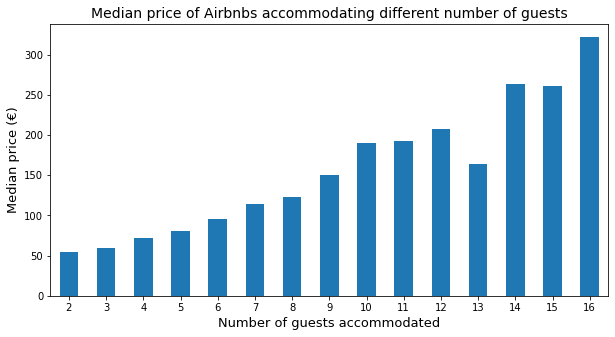

In [15]:
plt.figure(figsize=(10,5))
airbnb.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price (€)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

## 2.2. Categorical variables

In [16]:
# verificando as principais estatísticas categóricas
airbnb.describe(include='O')

name  \
count                                               17514   
unique                                              17220   
top     Amazing, Spacious 1 Bed Apart, Great View&Loca...   
freq                                                    9   

                              description host_response_time  \
count                               17511              17521   
unique                              16471                  5   
top     <b>License number</b><br />Exempt     within an hour   
freq                                   76               9525   

       host_response_rate       neighborhood property_type        room_type  \
count               17521              17521         17521            17521   
unique                  5                128             3                4   
top                  100%  Santa Maria Maior         House  Entire home/apt   
freq                 9679               2950         12107            13873   

       last_review review_scores_rating review_scores_accuracy  \
count        15204                17521                  17521   
unique        1348                    2                      4   
top     2021-11-21             0-79/100                    5/5   
freq           423                15204                  14397   

       review_scores_checkin review_scores_communication  \
count                  17521                       17521   
unique                     4                           4   
top                      5/5                         5/5   
freq                   14486                       14521   

       review_scores_location review_scores_value time_since_first_review  \
count                   17521               17521                   17521   
unique                      4                   4                       6   
top                       5/5                 5/5              no reviews   
freq                    14510               13948                    7876   

       time_since_last_review  
count                   17521  
unique                      6  
top                no reviews  
freq                    16712

`neighbourhood`

`property_type` and `room_type`

About 68% of properties are houses. The remainder are apartments or more uncommon property types (e.g. bed and breakfast).

About 79% of listings are entire homes (i.e. you are renting the entire property on your own). Most of the remainder are private rooms (i.e. you are renting a bedroom and possibly also a bathroom, but there will be other people in the property). Fewer than 1% are shared rooms (i.e. you are sharing a room with either the property owner or other guests).

In [17]:
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    airbnb[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

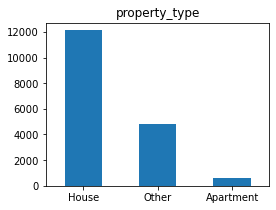

House        0.690999
Other        0.272930
Apartment    0.036071
Name: property_type, dtype: float64


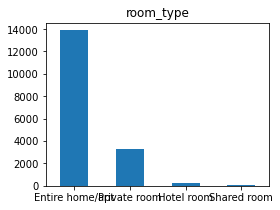

Entire home/apt    0.791793
Private room       0.186234
Hotel room         0.015810
Shared room        0.006164
Name: room_type, dtype: float64


In [18]:
for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(4,3))
    print(airbnb[col].value_counts(normalize=True))

`review categories`

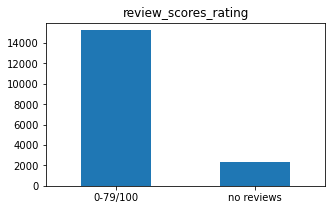

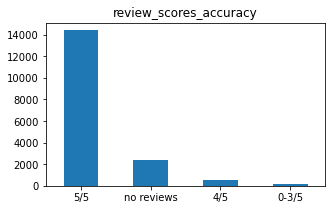

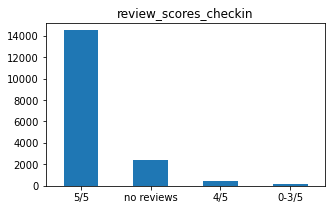

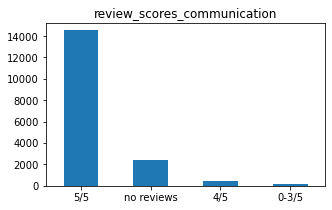

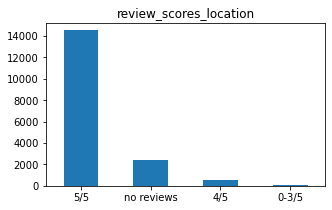

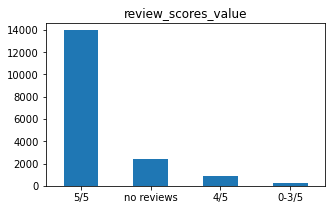

In [19]:
for col in list(airbnb.columns[airbnb.columns.str.startswith("review_scores") == True]):
    category_count_plot(col, figsize=(5,3))

For every review category, the majority of listings that have had a review have received a 5/5 rating for that category (or 95-100/100 overall). Ratings or 4 or below are rare. Guests seem to be most positive about communication, check-ins and accuracy. As noted previously, over a quarter of listings have not yet been reviewed. **rever**

`first_review` and `last_review `

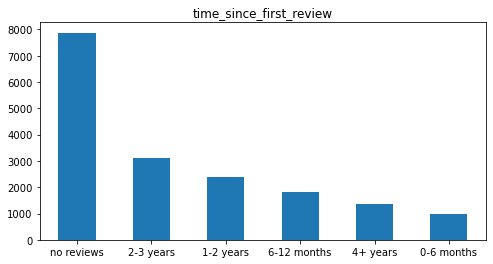

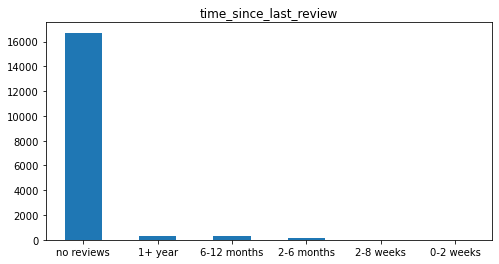

In [20]:
for col in ['time_since_first_review', 'time_since_last_review']:
    category_count_plot(col)

The most common time period in which currently live Airbnb listings had their first review is 2-3 years. This means that a lot of listings on the site have been active for at least a couple of years. Relatively few have been active for more than four years, however.

The most common category for the time since a listing received its last review is 1+ years. This means that a lot of listings have not been reviewed recently. The majority of these are probably what are sometimes referred to 'inactive' listings, because although they are technically live on the site, they do not have their calendards open and are not available to book.

## 2.3. Understading the data

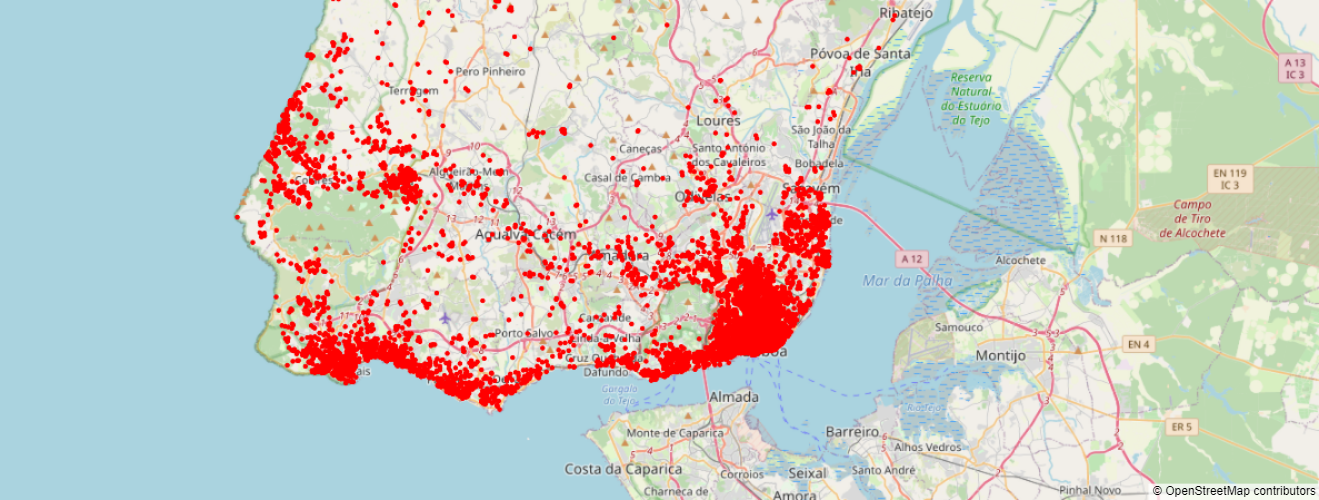

In [21]:
# plotando o mapa
fig = px.scatter_mapbox(airbnb, lat="latitude", lon="longitude", hover_name="name", color_discrete_sequence=["red"], 
                        zoom=10, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [22]:
# agrupando por tipo mais alugados
airbnb.groupby('room_type').agg({'room_type': 'count', 'price': 'mean'}).sort_values(by='price', ascending=False)

room_type       price
room_type                             
Hotel room             277  111.310469
Entire home/apt      13873  100.786203
Shared room            108   96.000000
Private room          3263   67.464603

A concentração dos tipos mais alugados são de casas/apartamentos e quartos inteiros, os quartos partilhados são os menos procurados.

Vou plotar um scatterplot com latitude e longitude, separando os pontos por cor para termos uma idéia da distribuição. Já vimos no mapa que a concentação maior de locais alugados são próximos as praias.

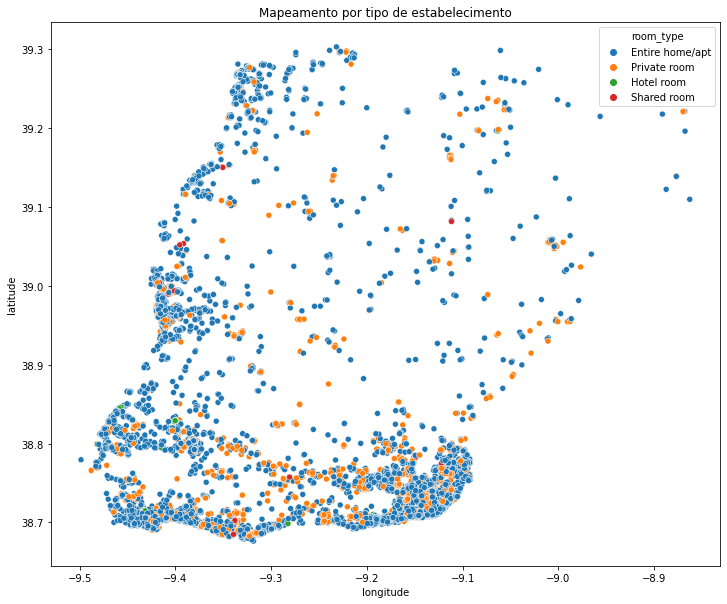

In [23]:
# definindo a área de plotagem
fig, ax = plt.subplots(figsize = (12,10))

# plotando o gráfico
ax = sns.scatterplot(data=airbnb, y="latitude", x="longitude", hue='room_type')
ax.set_title('Mapeamento por tipo de estabelecimento')
plt.show()

## 2.4. Time Series

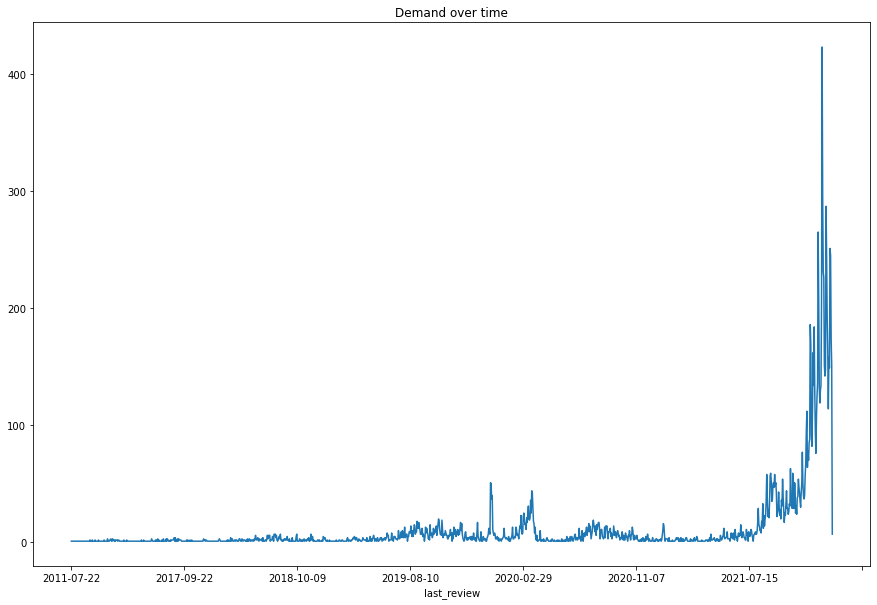

In [24]:
#Qual a variação de demanda ao longo do tempo?
# definindo a área de plotagem
plt.figure(figsize=(15,10))

# plotando o gráfico
airbnb.groupby('last_review')['name'].count().plot()
plt.title('Demand over time')
plt.show()

In [25]:
min(airbnb.host_since).strftime('%d %B %Y')

'22 April 2009'

In [26]:
max(airbnb.host_since).strftime('%d %B %Y')

'08 December 2021'

Of the Airbnb hosts that are still listing on the site, the first joined on 22 April 2009, and the most recent joined on 08 December 2021

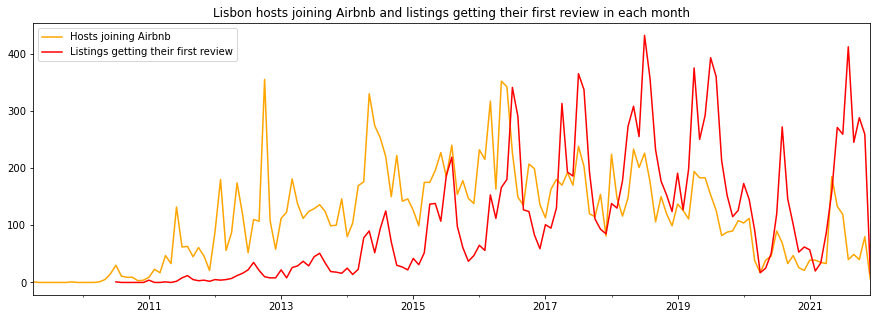

In [27]:
plt.figure(figsize=(15,5))
airbnb.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='orange')
airbnb.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='red')
plt.title('Lisbon hosts joining Airbnb and listings getting their first review in each month')
plt.legend()
plt.xlim('2009-04-22', '2021-12-08') # Limiting to whole months
plt.xlabel('')
plt.ylabel('')
plt.show()

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
# Creating dataframes for time series analysis
ts_host_since = pd.DataFrame(airbnb.set_index('host_since').resample('MS').size())
ts_first_review = pd.DataFrame(airbnb.set_index('first_review').resample('MS').size())

# Renaming columns
ts_host_since = ts_host_since.rename(columns={0: 'hosts'})
ts_host_since.index.rename('month', inplace=True)
ts_first_review = ts_first_review.rename(columns={0: 'reviews'})
ts_first_review.index.rename('month', inplace=True)


In [30]:
def decompose_time_series(df, title=''):
    """
    Plots the original time series and its decomposition into trend, seasonal and residual.
    """
    # Decomposing the time series
    decomposition = seasonal_decompose(df)
    
    # Getting the trend, seasonality and noise
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plotting the original time series and the decomposition
    plt.figure(figsize=(12,8))
    plt.suptitle(title, fontsize=14, y=1)
    plt.subplots_adjust(top=0.80)
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()

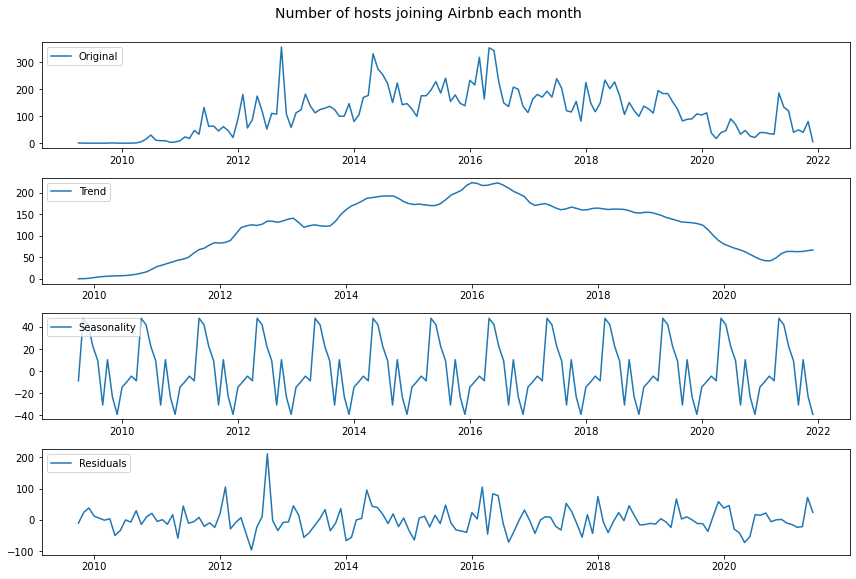

In [31]:
decompose_time_series(ts_host_since, title='Number of hosts joining Airbnb each month')

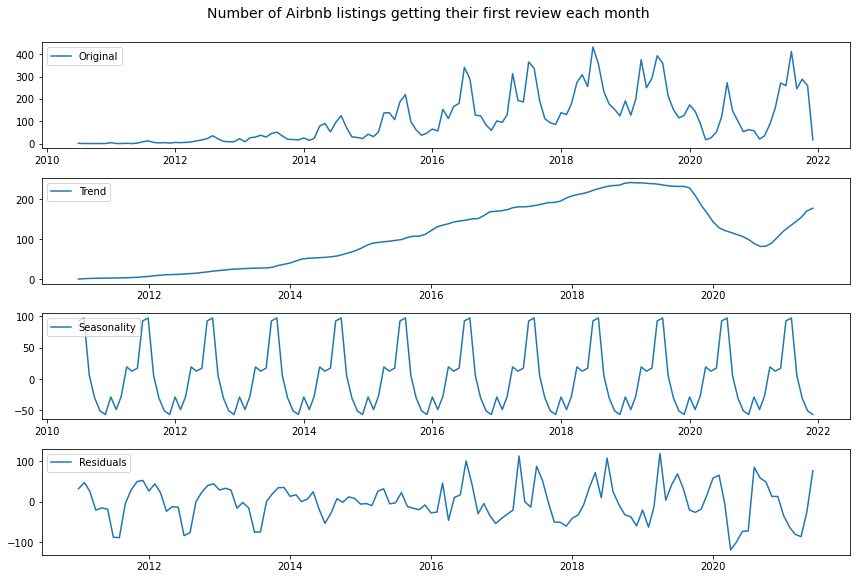

In [32]:
decompose_time_series(ts_first_review, title='Number of Airbnb listings getting their first review each month')

As seen above, there is a clear seasonality. Every year, you see a peak towards hosts joining around the middle of the year (summer), and the lowest points are the beginning and the end of each year. There is a big peak in the number of hosts joining Airbnb in 2013, 2015 and 2017.  This(2015) was the year when Airbnb became increasingly popular for short-term lease, as a way to get around local legislation and taxation. 



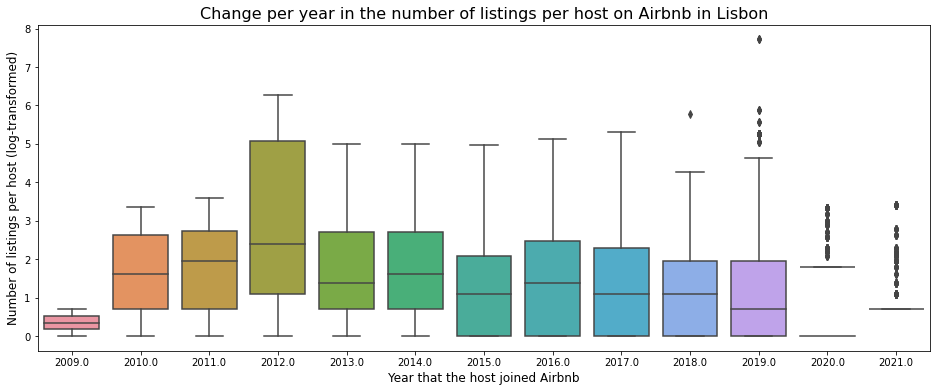

In [33]:
plt.figure(figsize=(16,6))
sns.boxplot(airbnb.host_since.dt.year, np.log(airbnb.host_listings_count))
plt.xlabel('Year that the host joined Airbnb', fontsize=12)
plt.ylabel('Number of listings per host (log-transformed)', fontsize=12)
plt.title('Change per year in the number of listings per host on Airbnb in Lisbon', fontsize=16)
plt.show()

Another important pattern to observe is the number of listings per owner/host. There are a number of professional Airbnb management companies which host a large number of listings under a single host profile. However, there is no consistent upwards trend in the average number of properties managed by each host.

In [34]:
print("Average number of listings per host per year on Airbnb in Lisbon:")
print(round(airbnb.set_index('host_since').host_listings_count.resample('YS').mean(),2))

Average number of listings per host per year on Airbnb in Lisbon:
host_since
2009-01-01      1.50
2010-01-01      9.63
2011-01-01     10.50
2012-01-01    123.23
2013-01-01     13.53
2014-01-01     11.74
2015-01-01      7.56
2016-01-01     13.81
2017-01-01     11.13
2018-01-01      7.38
2019-01-01     20.36
2020-01-01      4.65
2021-01-01      2.55
Name: host_listings_count, dtype: float64


In [35]:
# we could further delete the columns with high cardinality(names, ids,etc) or high percentage of NaNs
drop_cols3 = ['last_review', 'first_review','host_since']
airbnb = airbnb.drop(drop_cols3, axis=1)
airbnb.shape 

(17521, 51)

In [36]:
# Resetting the index as we deleted some rows 
airbnb.reset_index(drop=True, inplace=True)